#https://www.tensorflow.org/tutorials/keras/classification?hl=ko

# 비지도 학습 

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

## k-평균 군집분석

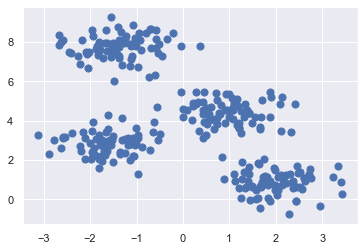

In [38]:
from sklearn.datasets.samples_generator import make_blobs
X,y_true=make_blobs(n_samples=300,centers=4,cluster_std=0.60,random_state=0)
plt.scatter(X[:,0],X[:,1],s=50)

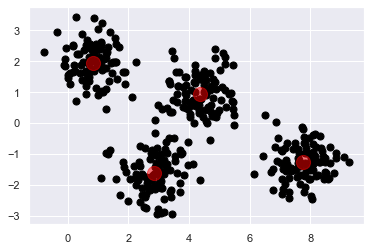

In [37]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)#중심점의 개수를 설정하는 초모수
kmeans.fit(X)#모델 적합
y_kmeans=kmeans.predict(X)#모델적용
#군집중심 시각화 
centers=kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1],c='black',s=50,cmap='virids')
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,alpha=0.5)


## 가우스 혼합모델
#k-평균 군집 분석 단점 개선<br>
#각 점과 모든 군집까지의 거리를 비교하여 확률적으로 군집 할당의 가능성 측정<br>
#원형 대신 타원형을 군집 경계로 허용<br>

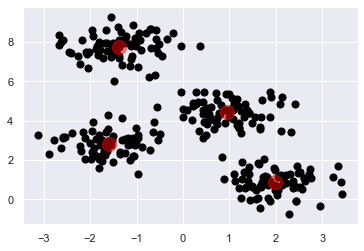

In [39]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)#중심점의 개수를 설정하는 초모수
kmeans.fit(X)#모델 적합
y_kmeans=kmeans.predict(X)#모델적용
#군집중심 시각화 
centers=kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1],c='black',s=50,cmap='virids')
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,alpha=0.5)

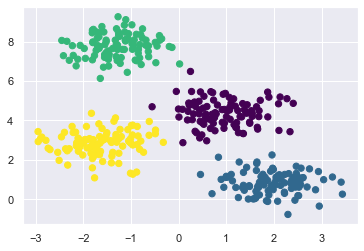

In [63]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels=gmm.predict(X)
centers=GaussianMixture
plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis')


In [68]:
#참조
#https://nicola-ml.tistory.com/8
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import pandas as pd

iris_data = load_iris()
irisDF = pd.DataFrame(data=iris_data.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
print(irisDF)

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris_data.data)
gmm_cluster_labels = gmm.predict(iris_data.data)
print(gmm_cluster_labels)
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris_data.target

iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [65]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0).fit(iris_data.data)
kmeans_cluster_labels = kmeans.predict(iris_data.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       3                 26
        2                 24
2       0                 32
        2                 17
        3                  1
Name: kmeans_cluster, dtype: int64


     sepal_length  sepal_width  petal_length  petal_width  gmm_cluster  \
0             5.1          3.5           1.4          0.2            0   
1             4.9          3.0           1.4          0.2            0   
2             4.7          3.2           1.3          0.2            0   
3             4.6          3.1           1.5          0.2            0   
4             5.0          3.6           1.4          0.2            0   
..            ...          ...           ...          ...          ...   
145           6.7          3.0           5.2          2.3            2   
146           6.3          2.5           5.0          1.9            2   
147           6.5          3.0           5.2          2.0            2   
148           6.2          3.4           5.4          2.3            2   
149           5.9          3.0           5.1          1.8            2   

     target  kmeans_cluster     pca_x     pca_y  
0         0               1 -2.684126  0.319397  
1         0

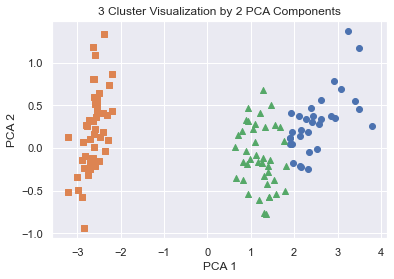

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris_data.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
print(irisDF)

maker0_ind = irisDF[irisDF['kmeans_cluster']==0].index
maker1_ind = irisDF[irisDF['kmeans_cluster']==1].index
maker2_ind = irisDF[irisDF['kmeans_cluster']==2].index

plt.scatter(x=irisDF.loc[maker0_ind,'pca_x'], y=irisDF.loc[maker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[maker1_ind,'pca_x'], y=irisDF.loc[maker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[maker2_ind,'pca_x'], y=irisDF.loc[maker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Cluster Visualization by 2 PCA Components')
plt.show()